<a href="https://colab.research.google.com/github/souravs17031999/cancer-prediction-machine-learning/blob/master/Zoo_animal_clasification_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zoo Animal Classification Problem

# Problem statement : 
This dataset consists of 101 animals from a zoo. There are 16 variables with various traits to describe the animals. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

## Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.tree import export_graphviz
import pydotplus

import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [0]:
df = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [0]:
df.shape

(858, 36)

# Data preprocessing
## Following steps will be followed :

* firstly check for all NaN/ Null values and replacing it appropriately
* Then i will go for converting categorical variables to numerical values by substituting dummy variables
* Then i will drop irrelevant columns 
* Then finally all datatypes will be changed to int/float     
and other measures like normalizing values if necessary.

### checking for data types 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

### checking for Null values

In [0]:
# since we can see '?' appears in various columns , so we can replace these with nan for further preprocessing 
df = df.replace('?', np.nan)

In [0]:
df = df.apply(pd.to_numeric)

In [0]:
print(pd.isnull(df).sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [0]:
df = df.fillna(df.mean().to_dict())

In [0]:
print(pd.isnull(df).sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Other stats measures

In [0]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,1.805585,0.287247,0.526440,0.219868,0.0,0.068137,0.217508,0.143183,0.034137,0.034137,0.034137,0.0,0.143183,0.034137,0.048244,0.302545,1.684784,1.644843,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# we need not drop any columns as all seems relevant here.

In [0]:
print(df.head())
print(df.shape)

   Age  Number of sexual partners  ...  Citology  Biopsy
0   18                        4.0  ...         0       0
1   15                        1.0  ...         0       0
2   34                        1.0  ...         0       0
3   52                        5.0  ...         0       0
4   46                        3.0  ...         0       0

[5 rows x 36 columns]
(858, 36)


## Data visualization and finding patterns/correlations

## First of all , let's investigate balancing of dataset samples

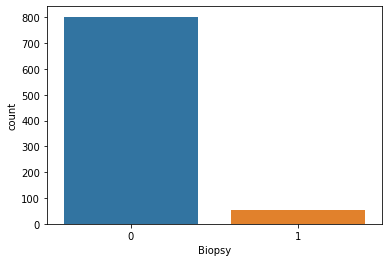

In [0]:
sns.countplot(df['Biopsy'])

In [0]:
df.columns[:35]

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology'],
      dtype='object')

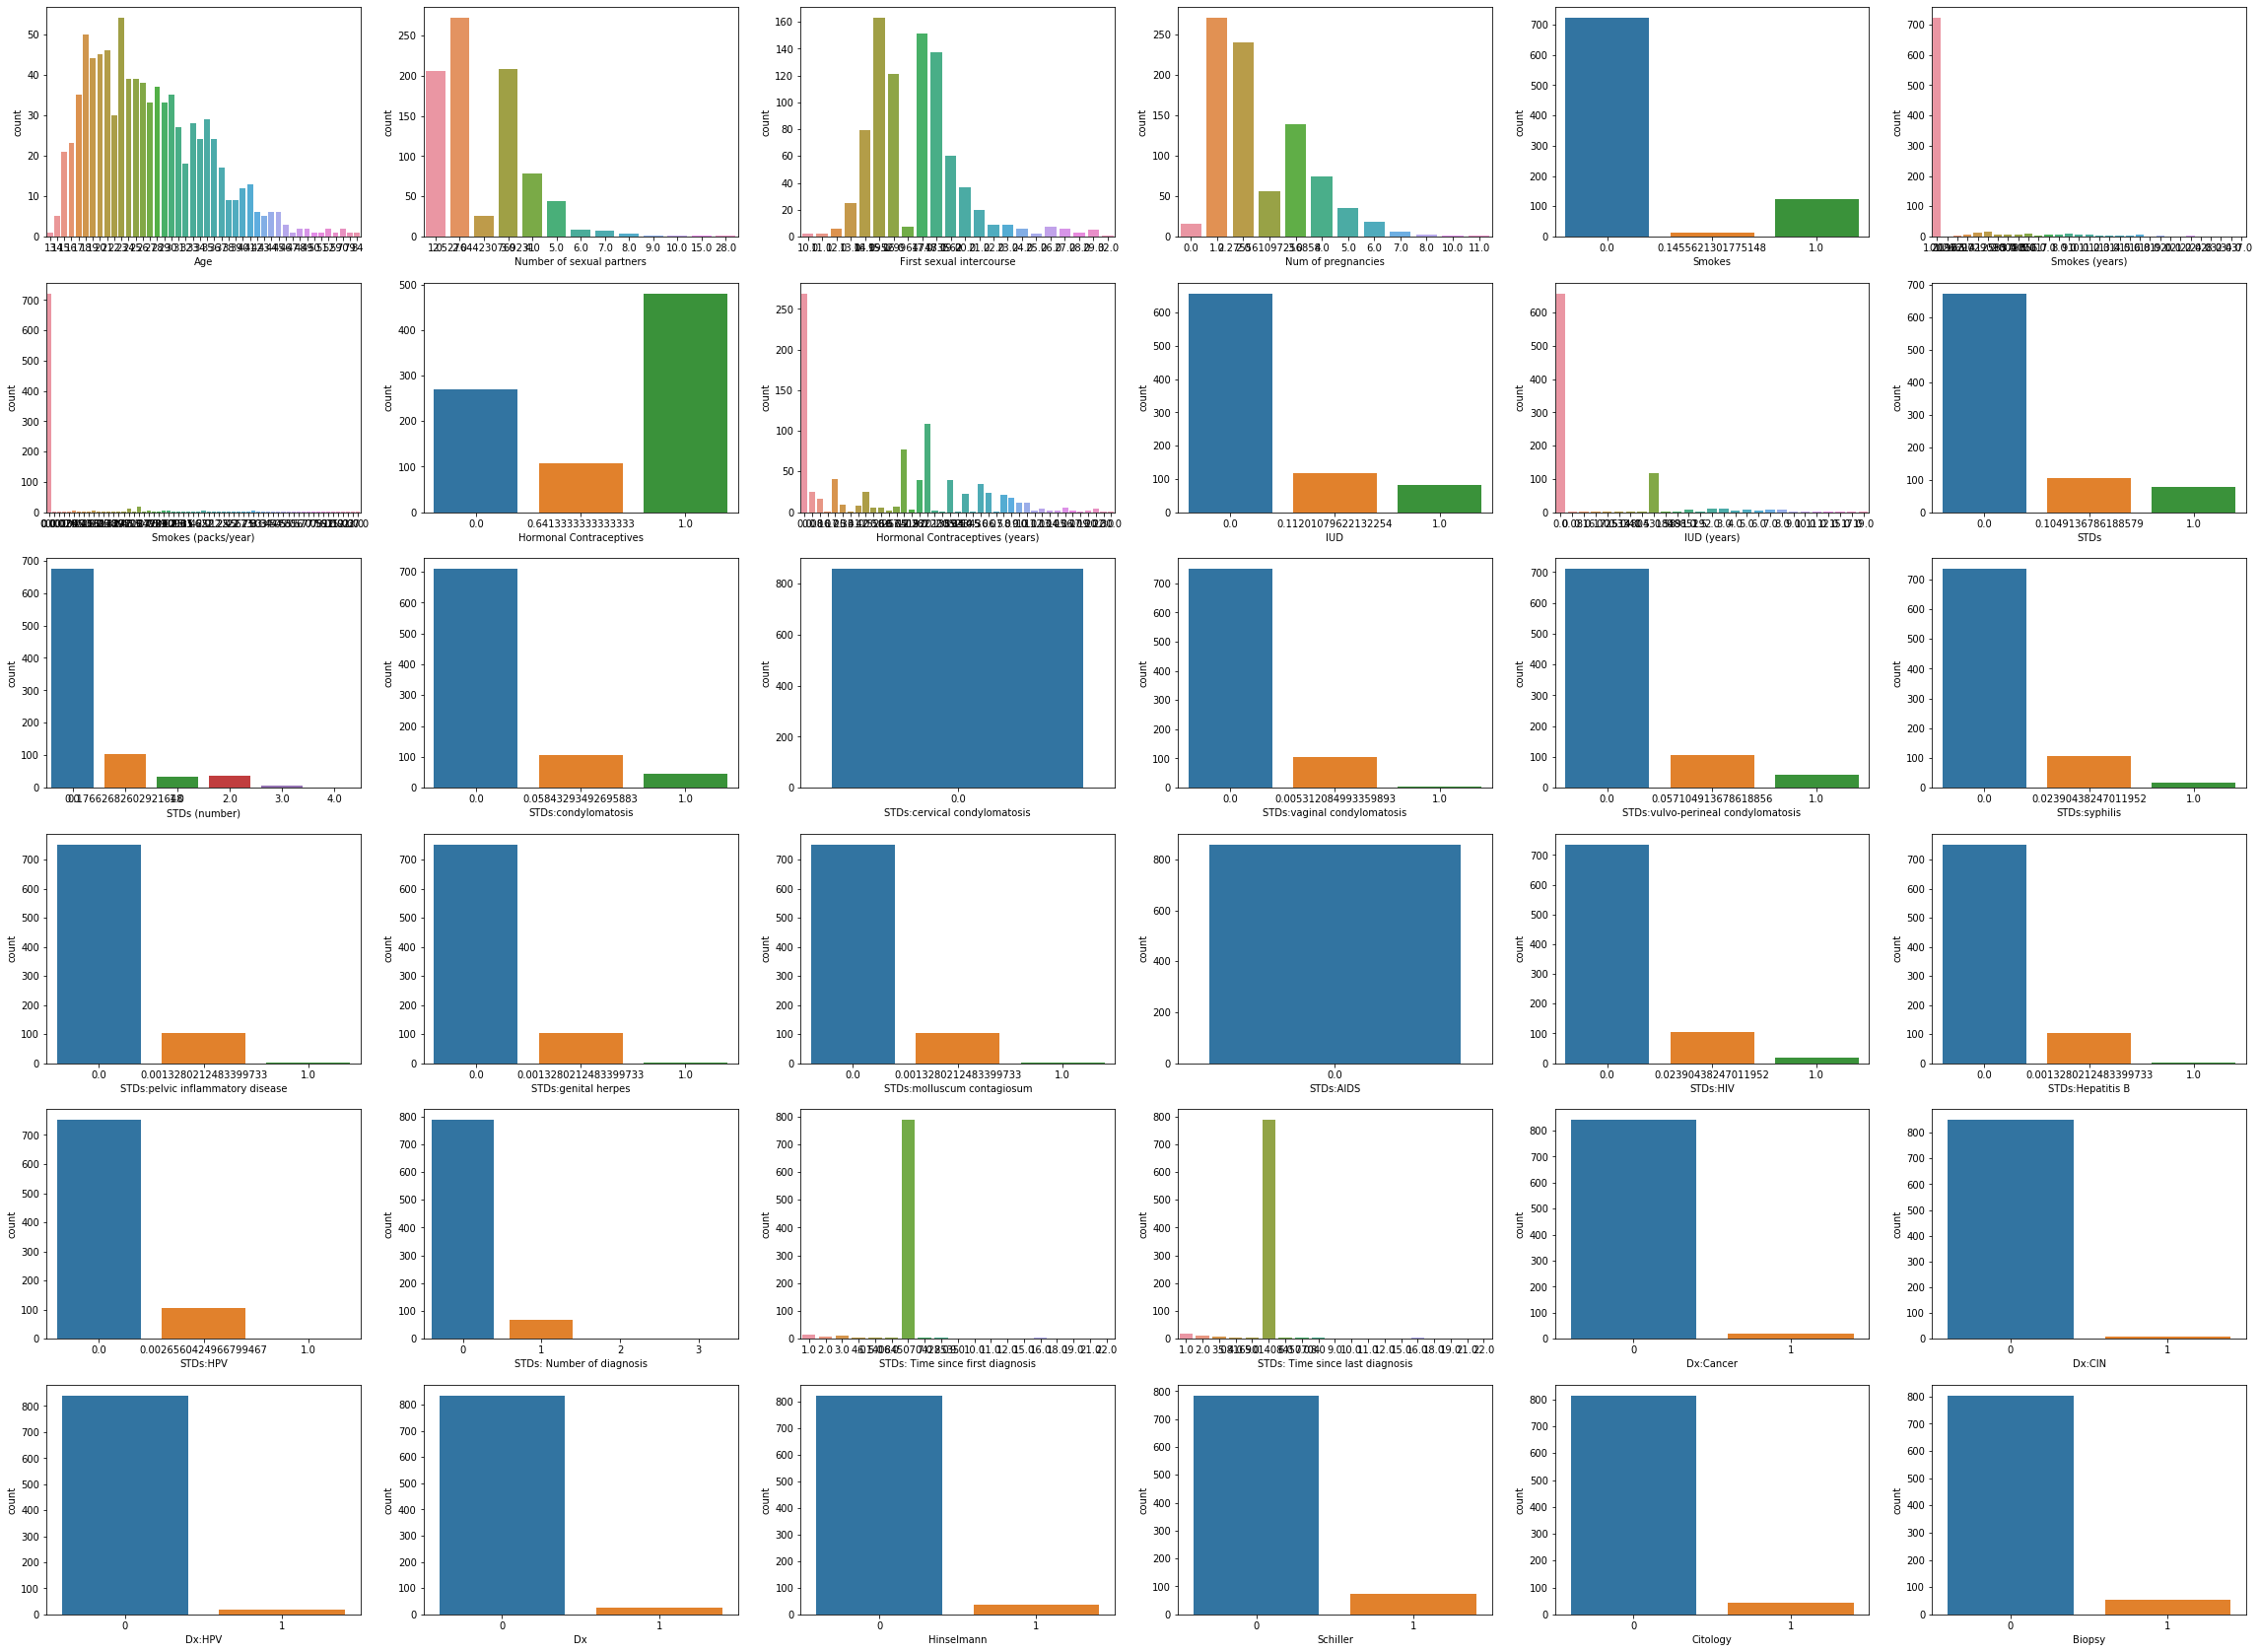

In [0]:
# investigate counts of unique values for each columns in dataframe
fig, ax =plt.subplots(6,6, figsize=(40, 30))
k = 0
for i in range(0, 6):
  for j in range(0, 6):
    sns.countplot(df[df.columns[k]], ax = ax[i][j])
    k += 1
fig.show()

## investigating the distribution of data 

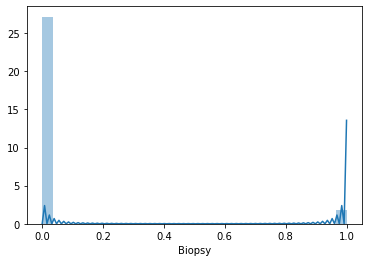

In [0]:
sns.distplot(df['Biopsy'])

## analyzing heatmaps !

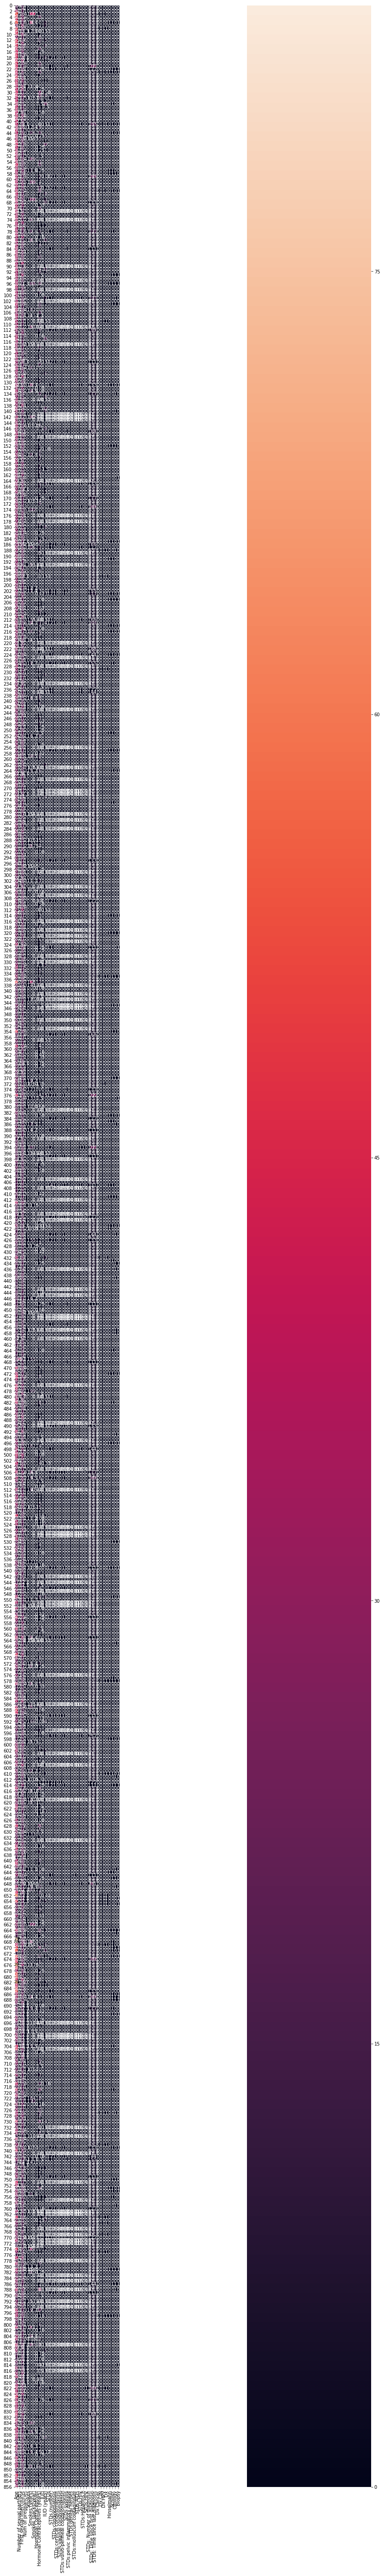

In [0]:
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(df, square = True, annot = True)

## Splitting dataset into train and testing 

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
def split(X, y):
   return train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train, X_test, y_train, y_test = split(X, y)

In [0]:
print(f'X train: {X_train.shape}')
print(f'y train: {y_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y test: {y_test.shape}')

X train: (686, 35)
y train: (686,)
X test: (172, 35)
y test: (172,)


In [0]:
def train_and_test(X_train, X_test, y_train, y_test):
  print('printing classifier results with all the other measures - precision, recall and f-score...')
  print()
  classifier1 = DecisionTreeClassifier(criterion='gini')
  classifier1.fit(X_train, y_train)
  print('Decision tree classifier : ', end = " ")
  print(accuracy_score(y_test, classifier1.predict(X_test)))
  cf1 = confusion_matrix(y_test,classifier1.predict(X_test))
  print()
  print(precision_recall_fscore_support(y_test,classifier1.predict(X_test)))
  print()

  classifier2 = RandomForestClassifier()
  classifier2.fit(X_train, y_train)
  print('Random forest classifier : ', end = " ")
  print(accuracy_score(y_test, classifier2.predict(X_test)))
  cf2 = confusion_matrix(y_test,classifier2.predict(X_test))
  print()
  print(precision_recall_fscore_support(y_test,classifier2.predict(X_test)))
  print()

  classifier3 = GaussianNB()
  classifier3.fit(X_train, y_train)
  print('Naive bayes classifier : ', end = " ")
  print(accuracy_score(y_test, classifier3.predict(X_test)))
  cf3 = confusion_matrix(y_test,classifier3.predict(X_test))
  print()
  print(precision_recall_fscore_support(y_test,classifier3.predict(X_test)))
  print()

  classifier4 = SVC()
  classifier4.fit(X_train, y_train)
  print('SVM classifier : ', end = " ")
  print(accuracy_score(y_test, classifier4.predict(X_test)))
  cf4 = confusion_matrix(y_test,classifier4.predict(X_test))
  print()
  print(precision_recall_fscore_support(y_test,classifier4.predict(X_test)))
  print()

  classifier5 = KNeighborsClassifier()
  classifier5.fit(X_train, y_train)
  print('KNN classifier : ', end = " ")
  print(accuracy_score(y_test, classifier5.predict(X_test)))
  cf5 = confusion_matrix(y_test,classifier5.predict(X_test))
  print()
  print(precision_recall_fscore_support(y_test,classifier5.predict(X_test)))
  print()

  
  return cf1, cf2, cf3, cf4, cf5, classifier1, classifier2

In [0]:
cf1, cf2, cf3, cf4, cf5, classifier1, classifier2 = train_and_test(X_train, X_test, y_train, y_test)

printing classifier results with all the other measures - precision, recall and f-score...

Decision tree classifier :  0.9651162790697675

(array([0.97590361, 0.66666667]), array([0.98780488, 0.5       ]), array([0.98181818, 0.57142857]), array([164,   8]))

Random forest classifier :  0.9651162790697675

(array([0.98170732, 0.625     ]), array([0.98170732, 0.625     ]), array([0.98170732, 0.625     ]), array([164,   8]))

Naive bayes classifier :  0.20348837209302326

(array([0.96551724, 0.04895105]), array([0.17073171, 0.875     ]), array([0.29015544, 0.09271523]), array([164,   8]))

SVM classifier :  0.9534883720930233

(array([0.95348837, 0.        ]), array([1., 0.]), array([0.97619048, 0.        ]), array([164,   8]))

KNN classifier :  0.9534883720930233

(array([0.95348837, 0.        ]), array([1., 0.]), array([0.97619048, 0.        ]), array([164,   8]))



Confusion matrix


Text(0.5, 32.0, 'Confusion matrix for decision trees')

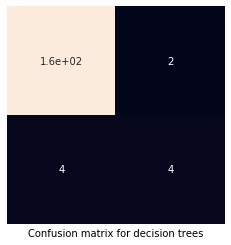

In [0]:
print('Confusion matrix')
sns.heatmap(cf1, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for decision trees')

Text(0.5, 32.0, 'Confusion matrix for random trees')

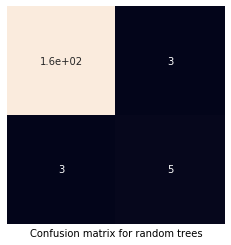

In [0]:
sns.heatmap(cf2, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for random trees')


Text(0.5, 32.0, 'Confusion matrix for Naive bayes classifier')

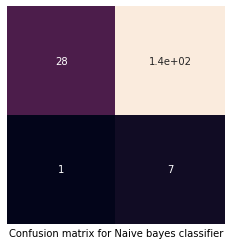

In [0]:
sns.heatmap(cf3, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for Naive bayes classifier')

Text(0.5, 32.0, 'Confusion matrix for SVM classifier')

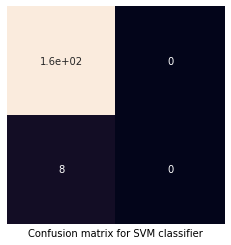

In [0]:
sns.heatmap(cf4, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for SVM classifier')

Text(0.5, 32.0, 'Confusion matrix for KNN classifier')

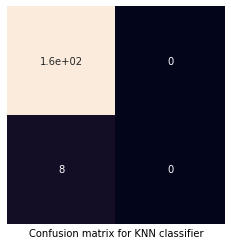

In [0]:
sns.heatmap(cf5, square = True, annot = True, cbar = False, yticklabels=False, xticklabels=False)
plt.xlabel('Confusion matrix for KNN classifier')

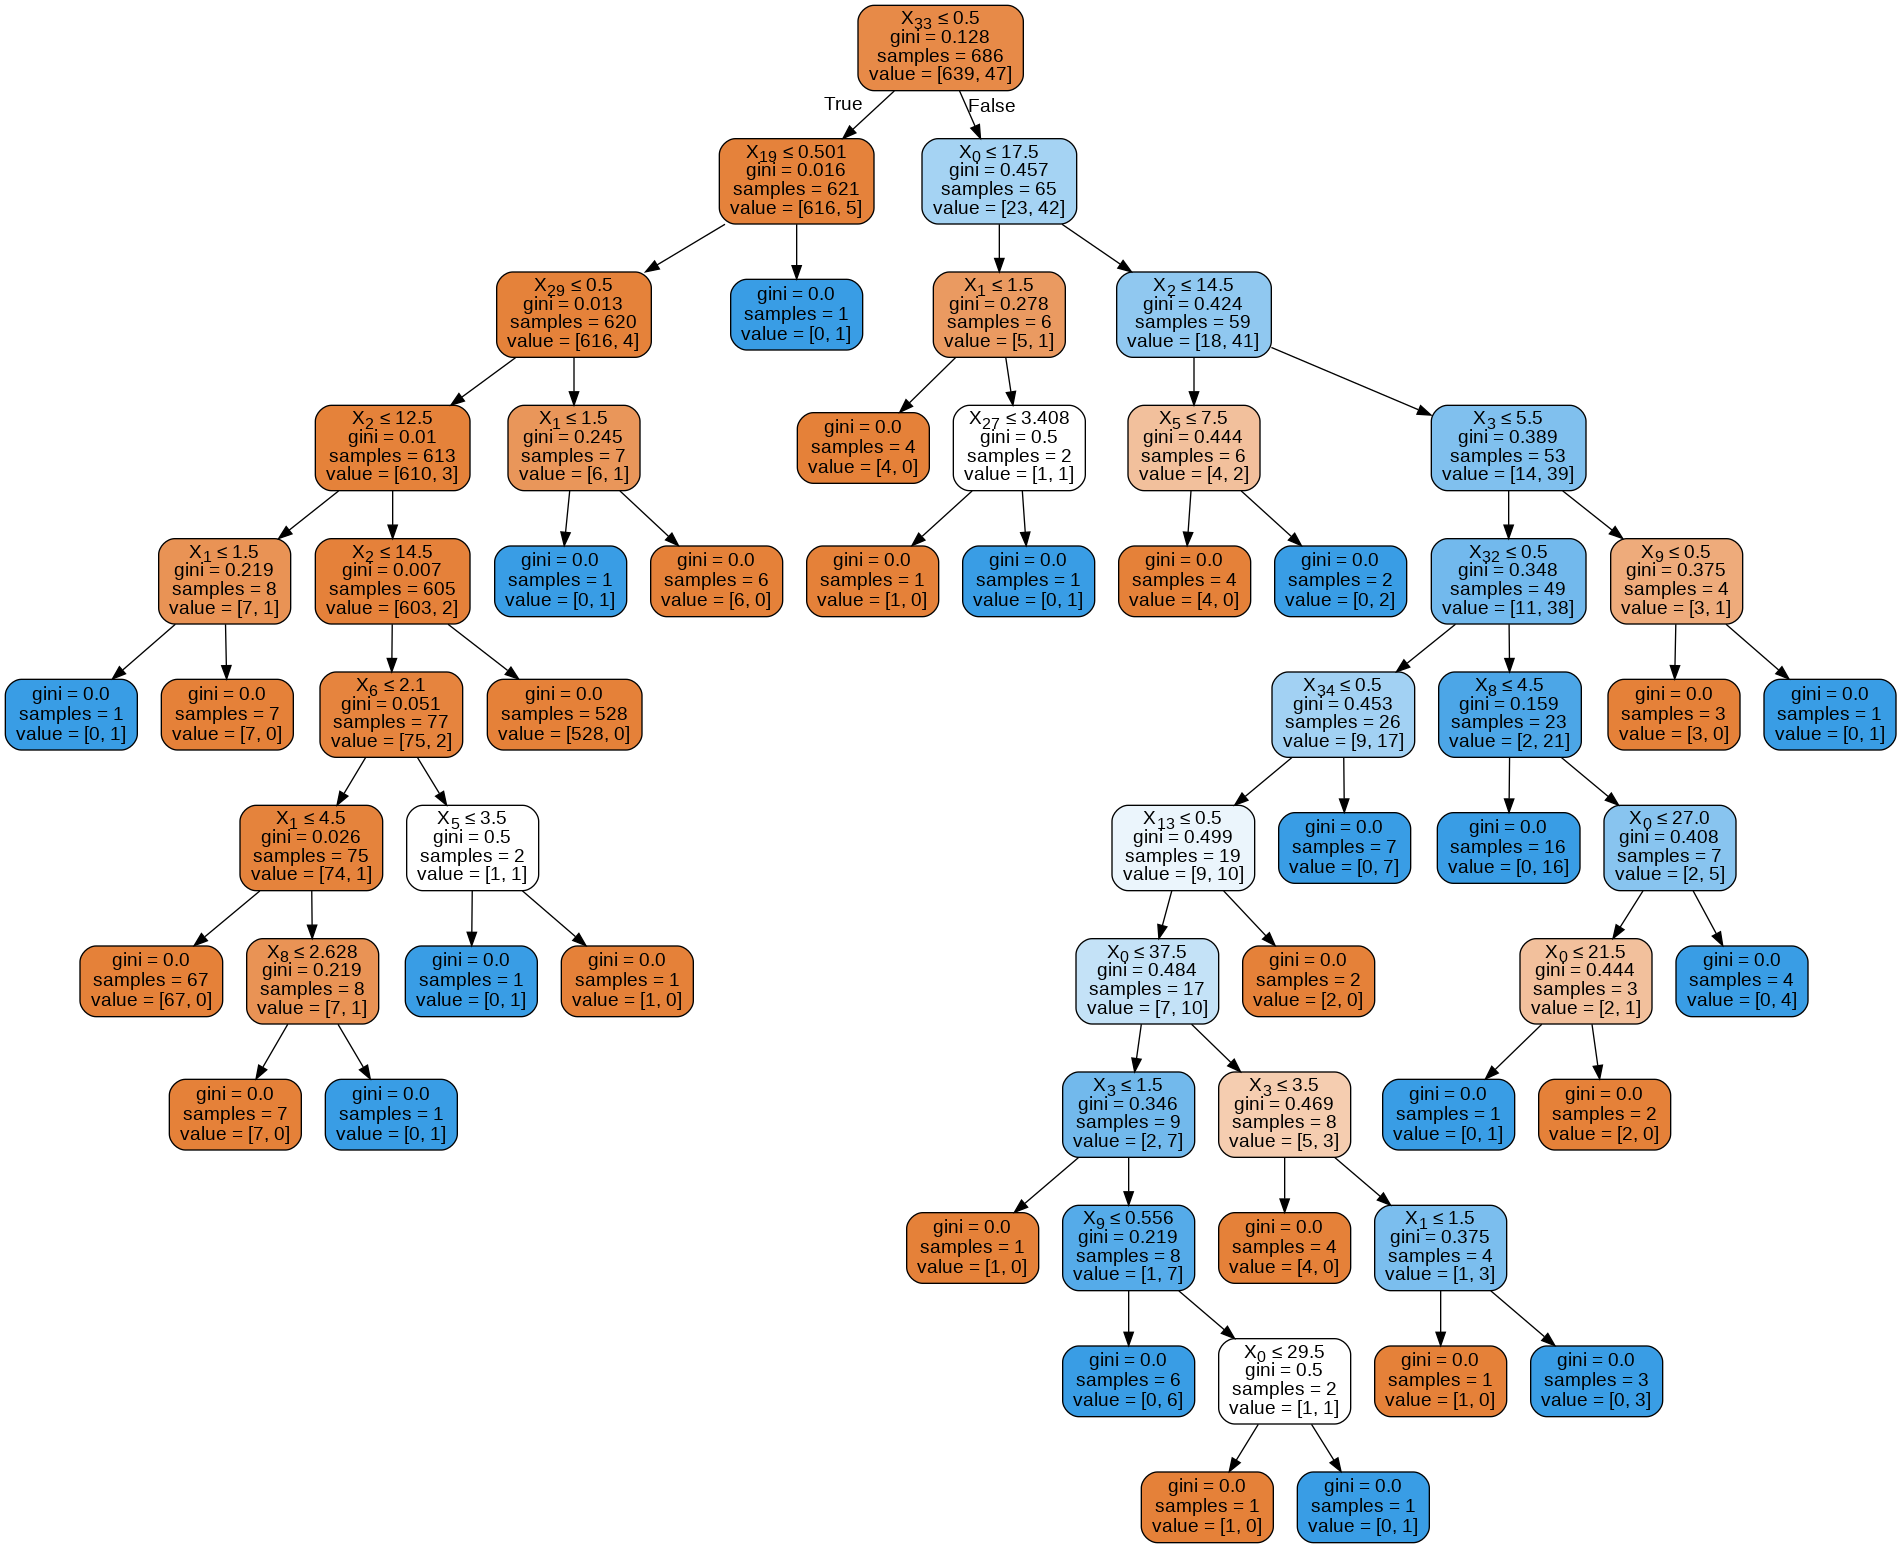

In [0]:
from IPython.display import Image  
import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image 

dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
